In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

print(tf.__version__)

2.4.1


In [2]:
numbers_data_train = pd.read_csv('./train.csv')
numbers_data_predict = pd.read_csv('./test.csv')

In [3]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

In [4]:
#def divide_data(train, test):
#  train_labels = train['label']
#  train_numbers = train.iloc[: , 1:]
#  test_numbers = test
#  return train_labels, train_numbers, test_numbers

def test_and_train(data, label, percent):
    point = math.floor(percent*data.shape[0])
    train_labels = data.iloc[:point, :][label]
    train_data = data.iloc[:point, 1:]
    test_labels = data.iloc[point:, :][label]
    test_data = data.iloc[point:, 1:]
    return train_labels, train_data, test_labels, test_data

In [5]:
train_labels, train_numbers, test_labels, test_numbers = test_and_train(numbers_data_train, 'label', 0.7)
#train_numbers

In [6]:
def get_number(index, dataset):
    if(dataset=='train'):
          return np.array(train_numbers.iloc[index, :]).reshape((28, 28))
    elif(dataset=='predict'):
        return np.array(numbers_data_predict.iloc[index, :]).reshape((28, 28))
    else:
        return np.array(test_numbers.iloc[index, :]).reshape((28, 28))

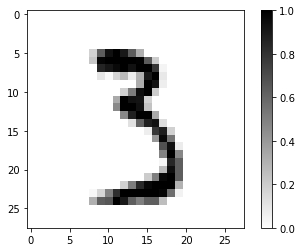

In [10]:
plt.figure()
plt.imshow(test_numbers_shaped[1], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
train_numbers_shaped = [] 
test_numbers_shaped = []
for i in range(train_numbers.shape[0]):
      train_numbers_shaped.append(get_number(i, 'train'))
train_numbers_shaped = np.array(train_numbers_shaped)

for i in range(test_numbers.shape[0]):
    test_numbers_shaped.append(get_number(i, 'test'))
test_numbers_shaped = np.array(test_numbers_shaped)

In [9]:
train_numbers_shaped = train_numbers_shaped / 255.0

test_numbers_shaped = test_numbers_shaped / 255.0

In [11]:
test_numbers_shaped[0].shape

(28, 28)

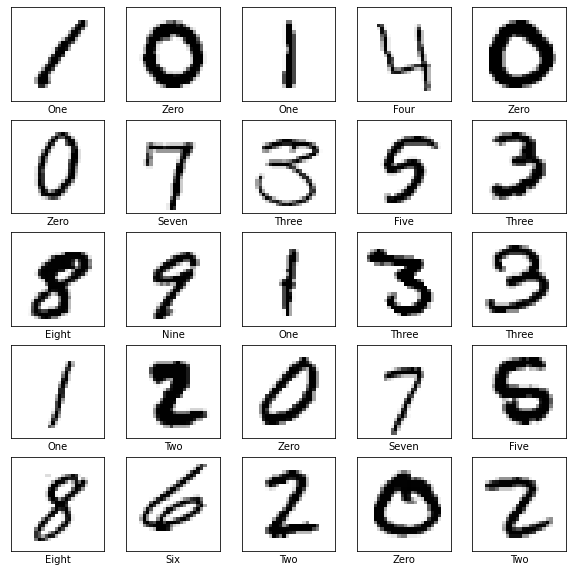

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_numbers_shaped[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.fit(train_numbers_shaped, train_labels, epochs=10)

Epoch 1/10
919/919 [==============================] - 2s 1ms/step - loss: 0.5612 - accuracy: 0.8422
Epoch 2/10
919/919 [==============================] - 1s 1ms/step - loss: 0.1703 - accuracy: 0.9518
Epoch 3/10
919/919 [==============================] - 1s 1ms/step - loss: 0.1111 - accuracy: 0.9676
Epoch 4/10
919/919 [==============================] - 1s 1ms/step - loss: 0.0799 - accuracy: 0.9766
Epoch 5/10
919/919 [==============================] - 1s 1ms/step - loss: 0.0568 - accuracy: 0.9845
Epoch 6/10
919/919 [==============================] - 1s 1ms/step - loss: 0.0463 - accuracy: 0.9877
Epoch 7/10
919/919 [==============================] - 1s 1ms/step - loss: 0.0318 - accuracy: 0.9917
Epoch 8/10
919/919 [==============================] - 1s 1ms/step - loss: 0.0294 - accuracy: 0.9915
Epoch 9/10
919/919 [==============================] - 1s 1ms/step - loss: 0.0199 - accuracy: 0.9953
Epoch 10/10
919/919 [==============================] - 1s 1ms/step - loss: 0.0172 - accuracy: 0.9955

In [16]:
test_loss, test_acc = model.evaluate(test_numbers_shaped,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

394/394 - 0s - loss: 0.1047 - accuracy: 0.9702

Test accuracy: 0.9702404737472534


In [17]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_numbers_shaped)
#predictions[5]

In [19]:
test_labels = test_labels.reset_index(drop=True)#.shape
#test_numbers_shaped.shape

In [20]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

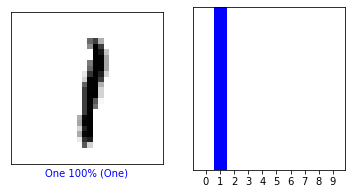

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_numbers_shaped)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

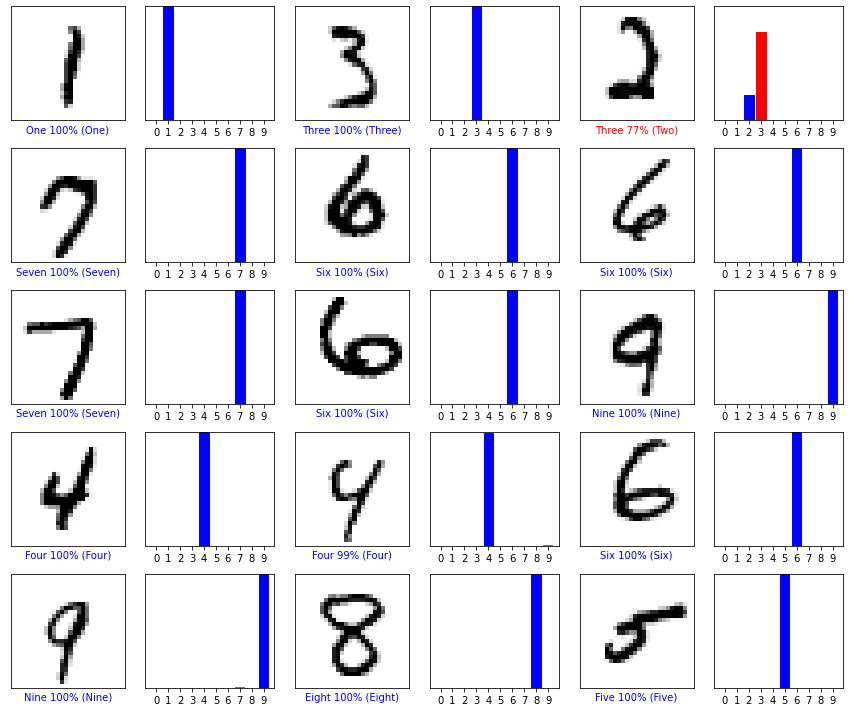

In [22]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_numbers_shaped)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [23]:
# Grab an image from the test dataset.
img = test_numbers_shaped[1]

print(img.shape)

(28, 28)


In [24]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [25]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.8294412e-11 2.3654582e-07 2.8656006e-08 9.9998093e-01 6.9674249e-12
  6.3641346e-06 2.3579058e-13 8.9740194e-12 3.9645433e-06 8.6132195e-06]]


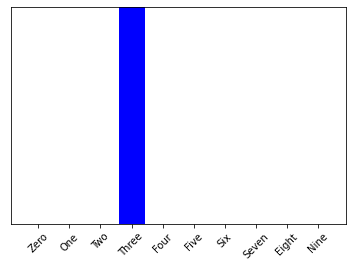

In [26]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [27]:
class_names[np.argmax(predictions_single[0])]

'Three'

In [28]:
numbers_prediction = []
for i in range(numbers_data_predict.shape[0]):
    numbers_prediction.append(get_number(i, 'predict'))
numbers_prediction = np.array(numbers_prediction)

In [30]:
predictions_test = probability_model.predict(numbers_prediction)

Text(0.5, 0, 'Seven')

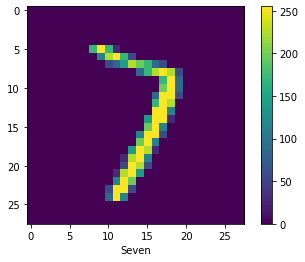

In [31]:
i = 920
plt.figure()
plt.imshow(numbers_prediction[i])
plt.colorbar()
plt.grid(False)
#plt.show()
label_predicted = np.argmax(predictions_test[i])
plt.xlabel(class_names[label_predicted])

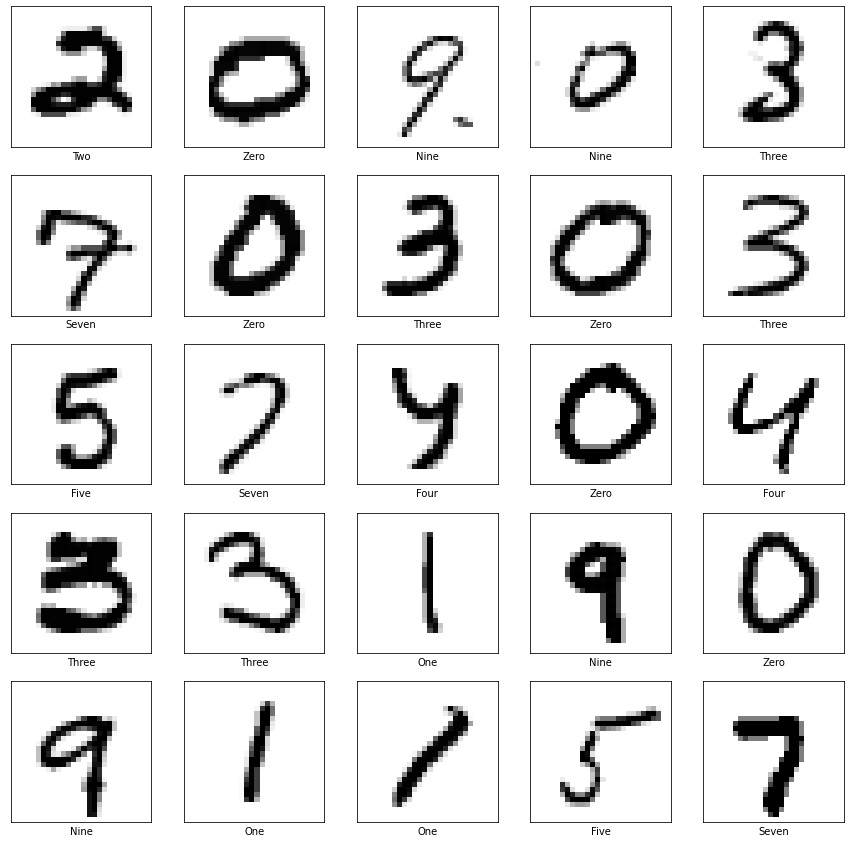

In [32]:
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(numbers_prediction[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(predictions_test[i])])
plt.show()

In [95]:
model.save_weights('./my_checkpoint')

In [97]:
get_number(1, 'train').shape

(28, 28)